---------------------------------------------------------------------------------------------------------------------------------------
					_________________________
					|  Zameen.com Property  |
					|_______________________|
---------------------------------------------------------------------------------------------------------------------------------------
					_________________________
					| Data types of the CSV |
					|_______________________|
Property_ID        int64
Location_ID      float64
Page_Url          object
Property_Type     object
Price            float64
Location          object
City              object
Province_Name     object
Latitude         float64
Longitude        float64
Baths            float64
Area              object
Purpose           object
Bedrooms         float64
Date_Added        object
Agency            object
Agent             object
dtype: object


-----------------------------------------------------------------------------------------------------

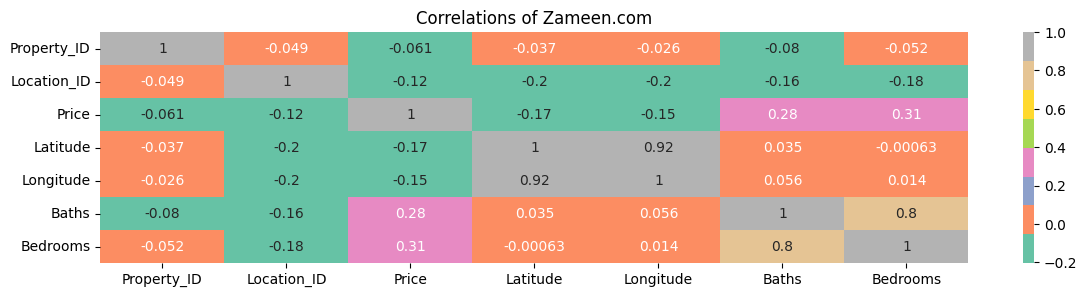



---------------------------------------------------------------------------------------------------------------------------------------
			___________________________________________________________________________________________
			| Correlation b/w number of properties listed by an agency and the average property price |
			|_________________________________________________________________________________________|


0.01942666760389456
---------------------------------------------------------------------------------------------------------------------------------------
			_________________________________________
			| DataFrame with 'price_per_sqm' column |
			|_______________________________________|
       Property_ID  Location_ID  \
0           347795          8.0   
1           482892         48.0   
2           555962         75.0   
5           785289       3102.0   
7           983065       3749.0   
...            ...          ...   
34870     14224524       6756.0   
3487

In [ ]:

#`````````````````````````````````````````````````````````````````` QUESTION NO 1 ``````````````````````````````````````````````````````````````
#Tashfeen Abbasi
#i22-2041
#DS-D
#Libararies


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#Sklearn Libraries

from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


#`````````````````````````````````````````````````````````````` PRE-PROCESSING ````````````````````````````````````````````````````````


print("---------------------------------------------------------------------------------------------------------------------------------------")
print("\t\t\t\t\t_________________________")
print("\t\t\t\t\t|  Zameen.com Property  |")
print("\t\t\t\t\t|_______________________|")
print("---------------------------------------------------------------------------------------------------------------------------------------")

#File read kro
real_property = pd.read_csv("Q1_property.csv",delimiter=';')


tashi_data_org=pd.DataFrame(real_property)


#Columns kay name beh da dooo
colsss = ["Property_ID", "Location_ID", "Page_Url", "Property_Type", "Price", "Location",
                 "City", "Province_Name", "Latitude", "Longitude", "Baths", "Area",
                 "Purpose", "Bedrooms", "Date_Added", "Agency", "Agent"]


tashi_data_org.columns = colsss


new_tashi_data_org=tashi_data_org.to_csv("New_Q1_Property.csv")


#Data Types
print("\t\t\t\t\t_________________________")
print("\t\t\t\t\t| Data types of the CSV |")
print("\t\t\t\t\t|_______________________|")
print(tashi_data_org.dtypes)
print("\n")






print("---------------------------------------------------------------------------------------------------------------------------------------")
print("\t\t\t\t\t__________________________")
print("\t\t\t\t\t|  Missing values in CSV |")
print("\t\t\t\t\t|________________________|")

#phly null values find kro, phr aun ka sum, Total null values
tashi_org_null=tashi_data_org.isnull()


tashi_org_sum=tashi_org_null.sum()


print(tashi_org_sum)


print("\n")




print("---------------------------------------------------------------------------------------------------------------------------------------")
print("\t\t\t\t\t_________________________________")
print("\t\t\t\t\t| Droping Missing values in CSV |")
print("\t\t\t\t\t|_______________________________|")



miss_val = tashi_data_org.isnull().sum()



print(miss_val)

#Missing values ko drop kr doo
tashi_data_org.dropna(inplace=True)


print("\n")






print("---------------------------------------------------------------------------------------------------------------------------------------")


print("\t\t\t\t\t___________________")
print("\t\t\t\t\t| Outliers in CSV |")
print("\t\t\t\t\t|_________________|")



int_cols = ["Property_ID", "Location_ID", "Price", "Latitude", "Longitude", "Baths", "Bedrooms"]



exclude_list = []


for i in int_cols:


    Q1 = tashi_data_org[i].quantile(0.25)

    Q3 = tashi_data_org[i].quantile(0.75)


    IQR = Q3 - Q1


    lower_bound = Q1 - 1.5 * IQR


    upper_bound = Q3 + 1.5 * IQR




    rows_with_outliers = tashi_data_org[(tashi_data_org[i] < lower_bound) | (tashi_data_org[i] > upper_bound)].index


    exclude_list.extend(rows_with_outliers)


    print("Column: {}".format(i))


    print("IQR: {}".format(IQR))


    print("Lower Bound: {}".format(lower_bound))


    print("Upper Bound: {}".format(upper_bound))


    print("Outliers: {}".format(len(rows_with_outliers)))


    print("\n")


no_outliers = tashi_data_org.drop(index=exclude_list).reset_index(drop=True)



#`````````````````````````````````````````````````````````````````` EDA ``````````````````````````````````````````````````````````````````




print("---------------------------------------------------------------------------------------------------------------------------------------")
print("\t\t\t\t\t__________________________________")
print("\t\t\t\t\t| Exploratory Data Analysis(EDA) |")
print("\t\t\t\t\t|________________________________|")


print("\t\t\t\t\t_________________________")
print("\t\t\t\t\t| Correlation Structure |")
print("\t\t\t\t\t|_______________________|")


#Correlation find kro, aur graph banao,
corr_data=tashi_data_org.corr(numeric_only=True)



print(corr_data)



print("---------------------------------------------------------------------------------------------------------------------------------------")


print('''
1) Values close to 1 indicates a strong positive correlation.
2) Values close to -1 indicate a strong negative correlation.
3) Values close to 0 indicate a weak or no correlation.
''')

# heatmap banaya, aur phr aus ma annot sy values print krwai
plt.figure(figsize=(14,3))


sns.heatmap(corr_data, annot=True, cmap='Set2')


plt.title('Correlations of Zameen.com')


plt.show()


print("\n")


print("---------------------------------------------------------------------------------------------------------------------------------------")

#Groupby use kiya, aur corr nikalna para

avg_price_by_agency = tashi_data_org.groupby('Agency')['Price'].mean()


agency_count = tashi_data_org['Agency'].value_counts()


agency_stats = pd.DataFrame({'PropertyCount': agency_count, 'AveragePrice': avg_price_by_agency})



corr_agency = agency_stats['PropertyCount'].corr(agency_stats['AveragePrice'])



print("\t\t\t___________________________________________________________________________________________")
print("\t\t\t| Correlation b/w number of properties listed by an agency and the average property price |")
print("\t\t\t|_________________________________________________________________________________________|")
print("\n")


print(corr_agency)



#``````````````````````````````````````````````````````` FEATURE ENGINEERING ```````````````````````````````````````````````````````````
print("---------------------------------------------------------------------------------------------------------------------------------------")

#area per sq meter, ais kay lia lambda ka function aur sath hae check kiya kay kay numerical ya nai

tashi_data_org['area_numeric'] = tashi_data_org['Area'].apply(lambda x: ''.join(filter(str.isdigit, str(x))))



tashi_data_org['area_numeric'] = pd.to_numeric(tashi_data_org['area_numeric'])


tashi_data_org['price_per_sqm'] = tashi_data_org['Price'] / tashi_data_org['area_numeric']



tashi_data_org = tashi_data_org.drop('area_numeric', axis=1)


print("\t\t\t_________________________________________")
print("\t\t\t| DataFrame with 'price_per_sqm' column |")
print("\t\t\t|_______________________________________|")


print(tashi_data_org)



print("---------------------------------------------------------------------------------------------------------------------------------------")


tashi_data_org['Date_Added'] = pd.to_datetime(tashi_data_org['Date_Added'])


tashi_data_org['Month_Added'] = tashi_data_org['Date_Added'].dt.month



tashi_data_org['Quarter_Added'] = tashi_data_org['Date_Added'].dt.quarter



tashi_data_org['Day_of_week_Added'] = tashi_data_org['Date_Added'].dt.day_name()



print("\t\t\t_______________________________________________")
print("\t\t\t| DataFrame with additional temporal features |")
print("\t\t\t|_____________________________________________|")



print(tashi_data_org)
print("---------------------------------------------------------------------------------------------------------------------------------------")



tashi_data_org[int_cols] = scale(tashi_data_org[int_cols])



property_data_scaled = pd.DataFrame(tashi_data_org, columns=tashi_data_org.columns)



print("\t\t\t__________________________________________")
print("\t\t\t| DataFrame after using standardization  |")
print("\t\t\t|________________________________________|")



print(property_data_scaled)



print("---------------------------------------------------------------------------------------------------------------------------------------")


#columns ma check krna
str_cols=["Page_Url","Property_Type","Location","City","Province_Name","Area","Purpose","Date_Added","Agency","Agent"]


l = {}



for i in tashi_data_org.columns:



    if tashi_data_org[i].dtype == 'object':


        #unique values nikali
        uni = tashi_data_org[i].unique()
        #enumerate wo index dalnay kay lia hta

        l[i] = {value: index for index, value in enumerate(uni)}


        tashi_data_org[i] = tashi_data_org[i].map(l[i])


print("\t\t\t___________________________________________________________")
print("\t\t\t|  DataFrame with manually encoded categorical variables  |")
print("\t\t\t|_________________________________________________________|")


print(tashi_data_org)



print("---------------------------------------------------------------------------------------------------------------------------------------")


print("\t\t\t____________________________________________________")
print("\t\t\t|  Divide the Data into Training and Testing Sets  |")
print("\t\t\t|__________________________________________________|")


X = tashi_data_org[int_cols]



Y = tashi_data_org['Price']


x_training, x_testing, y_training, y_testing = train_test_split(X, Y, test_size=0.2, random_state=42)


#yaha linear reggression ksi ma store, wasey try kiya nai ho raha
lm = LinearRegression()



val_fit = [True, False]


tashi_params = {'fit_intercept': None, 'mse': None}


for i in val_fit:


    lm.set_params(fit_intercept=i)



    lm.fit(x_training, y_training)



    y_pred = lm.predict(x_testing)



    mse = mean_squared_error(y_testing, y_pred)



    if tashi_params['mse'] is None:



        tashi_params['fit_intercept'] = i

        tashi_params['mse'] = mse


    elif mse < tashi_params['mse']:


        tashi_params['fit_intercept'] = i


        tashi_params['mse'] = mse


print("Hyperparameters: ", {'fit_intercept': tashi_params['fit_intercept']})



lm.fit_intercept = tashi_params['fit_intercept']


lm.fit(x_training, y_training)


y_pred = lm.predict(x_testing)


mse = mean_squared_error(y_testing, y_pred)


print("Mean Squared Error on Testing Set: ", mse)


#``````````````````````````````````````````````````````````````` Model Evaluation ```````````````````````````````````````````````````````````


print("---------------------------------------------------------------------------------------------------------------------------------------")





#MAE
print("\t\t\t_______________________")
print("\t\t\t| Mean Absoulte Error |")
print("\t\t\t|_____________________|")


mae = mean_absolute_error(y_testing, y_pred)


print("Mean Absolute Error on Testing Set: ", mae)

print("\n\n")




#MSE
print("\t\t\t______________________")
print("\t\t\t| Mean Squared Error |")
print("\t\t\t|____________________|")



mse = mean_squared_error(y_testing, y_pred)


print("Mean Squared Error on Testing Set: ", mse)
print("\n\n")



#RMSE
print("\t\t\t___________________________")
print("\t\t\t| Root Mean Squared Error |")
print("\t\t\t|_________________________|")



rmse = np.sqrt(mse)


print("Root Mean Squared Error on Testing Set: ", rmse)
print("\n\n")




#MAPE
print("\t\t__________________________________")
print("\t\t| Mean Absolute Percentage Error |")
print("\t\t|________________________________|")


absolute_percentage_error = np.abs((y_testing - y_pred) / y_testing)



mape = np.mean(absolute_percentage_error) * 100



print("Mean Absolute Percentage Error on Testing Set: ", mape)



In [ ]:

#Tashfeen Abbasi
#i22-2041
#DS-D
#Libararies

print("\t\t\t\t\t_________________________")
print("\t\t\t\t\t| Q2 By Tashfeen Abbasi |")
print("\t\t\t\t\t|_______________________|")
print("\n\n")
import pandas as pd


import numpy as np

from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix

from sklearn.preprocessing import MinMaxScaler

from sklearn.tree import  DecisionTreeClassifier

from sklearn.metrics import classification_report

from sklearn import preprocessing


from sklearn.ensemble import RandomForestClassifier


from sklearn.model_selection import train_test_split



tashi_labels = preprocessing.LabelEncoder()

print("\t\t\t\t\t___________________")
print("\t\t\t\t\t| Target Variable |")
print("\t\t\t\t\t|_________________|")
print("\n\n")


tashi_data = pd.read_csv("Q2_Fraud_check.csv")





str_cols = ['Undergrad', 'Marital.Status', 'Urban']


for i in str_cols:


    tashi_data[i] = tashi_labels.fit_transform(tashi_data[i])



risk_condition = (tashi_data['Taxable.Income'] >= 10002) & (tashi_data['Taxable.Income'] <= 30000)


good_condition = (tashi_data['Taxable.Income'] > 30000)


tashi_data.loc[risk_condition, 'tax_income'] = 'RISKY'


tashi_data.loc[good_condition, 'tax_income'] = 'GOOD'


print(tashi_data)



print("\n\n")

print("\t\t\t\t\t_______________________")
print("\t\t\t\t\t| Feature Engineering |")
print("\t\t\t\t\t|_____________________|")
print("\n\n")



X = tashi_data.drop(['Taxable.Income', 'tax_income'], axis = 1)



Y = tashi_data['tax_income']



X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)



classifier = DecisionTreeClassifier(random_state = 42)




classifier.fit(X_train, y_train)



predict_y = classifier.predict(X_test)




tashi_accuracy = accuracy_score(y_test, predict_y)





tashi_confusion_mat = confusion_matrix(y_test, predict_y)




tashi_report = classification_report(y_test, predict_y)


print("\n\n")






print("\t\t\t\t\t____________")
print("\t\t\t\t\t| Accuracy |")
print("\t\t\t\t\t|__________|")
print(tashi_accuracy)
print("\n\n")






print("\t\t\t\t\t____________________")
print("\t\t\t\t\t| Confusion Matrix |")
print("\t\t\t\t\t|__________________|")
print(tashi_confusion_mat)
print("\n\n")






print("\t\t\t\t\t________________________")
print("\t\t\t\t\t| Classification Report|")
print("\t\t\t\t\t|______________________|")




print(tashi_report)
print("\n\n")





print("\t\t\t\t\t____________________________________")
print("\t\t\t\t\t| Model Development And Evaluation |")
print("\t\t\t\t\t|__________________________________|")
print("\n\n")




tashi_data = pd.get_dummies(tashi_data, columns=['Undergrad', 'Marital.Status', 'Urban'])





print("\t\t\t\t\t____________")
print("\t\t\t\t\t| Encoding |")
print("\t\t\t\t\t|__________|")
print("\n\n")






print(tashi_data)
print("\n\n")



tashi_data['tax_income'] = np.where(tashi_data['Taxable.Income'] <= 30000, 0, 1)






print(tashi_data.head())
print("\n\n")







tashi_scaler = MinMaxScaler()

tashi_cols = ['Work.Experience', 'City.Population']







tashi_data[tashi_cols] = tashi_scaler.fit_transform(tashi_data[tashi_cols])

print(tashi_data)





print("\n\n")



X = tashi_data.drop(['Taxable.Income', 'tax_income'], axis=1)



Y = tashi_data['tax_income']



X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)



tashi_classify = DecisionTreeClassifier(random_state=42)




tashi_classify.fit(X_train, y_train)





tashi_y_pridicton = tashi_classify.predict(X_test)



print("\t\t\t\t\t________________________")
print("\t\t\t\t\t| Classification Report|")
print("\t\t\t\t\t|______________________|")
print("\n\n")




classification_report_output = classification_report(y_test, tashi_y_pridicton)





print(classification_report_output)



					_________________________
					| Q2 By Tashfeen Abbasi |
					|_______________________|



					___________________
					| Target Variable |
					|_________________|



     Undergrad  Marital.Status  Taxable.Income  City.Population  \
0            0               2           68833            50047   
1            1               0           33700           134075   
2            0               1           36925           160205   
3            1               2           50190           193264   
4            0               1           81002            27533   
..         ...             ...             ...              ...   
595          1               0           76340            39492   
596          1               0           69967            55369   
597          0               0           47334           154058   
598          1               1           98592           180083   
599          0               0           96519           158137   

     Work.Experience 